<a href="https://colab.research.google.com/github/louzeiro/extraCurricular/blob/main/Visualizacao_e_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Formação Cientista de Dados
<br>prof Fernando Amaral
</h1>
Disponível em: https://www.udemy.com/course/cientista-de-dados/


# Seção: Visualização e dashboard

Notebook desenvolvido no estudo para visualização e criação de dashboards.

## Carregamento das bibliotecas e da base de dados

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Visualizações da distribuição dos dados

### Histograma e linha de densidade

In [55]:
dados = pd.read_csv('trees.csv')
dados.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


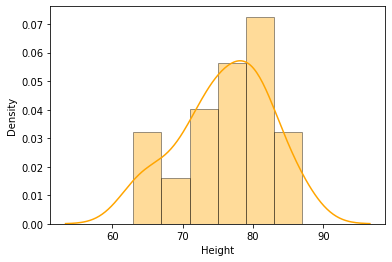

In [3]:

sns.distplot(dados.iloc[:,1],                ## utilizando os dados da coluna Height 	
             hist = True,                    ## habilitando o histograma
             bins = 6,                       ## utilizando 6 intervalos para a distribuição dos dados 
             kde = True,                     ## habilitando a linha de densidade dos dados
             color = 'orange',               ## cor do histograma
             hist_kws={'edgecolor':'black'}) ## cor das linhas do intervalo de classes

### Gráfico de dispersão

Com o matplotlib

Text(0, 0.5, 'Circunferência')

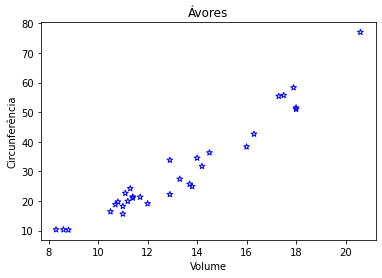

In [4]:
plt.scatter(dados.Girth,        #eixo X
            dados.Volume,       #eixo Y
            color = 'blue',     #cor
            facecolors='none',  #sem preenchimento
            marker='*')         #tipo de marcador
plt.title('Ávores')
plt.xlabel('Volume')
plt.ylabel('Circunferência')

Com seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


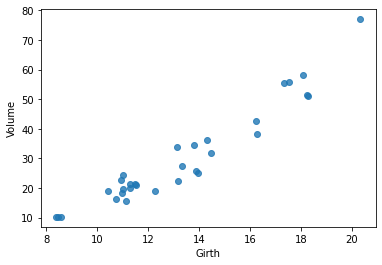

In [ ]:
sns.regplot(dados.Girth,
            dados.Volume,
            data = dados,
            x_jitter = 0.3,   # gera uma tremulação dos dados para facilitar a visualização dos dados sobrepostos
            fit_reg = False)  # Linha de tendência

### Boxplot

Matplotlib

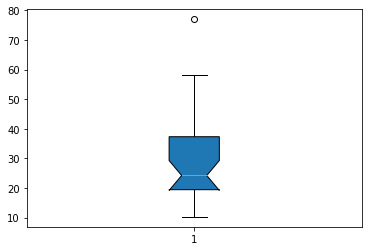

In [43]:
ax = plt.boxplot(dados.Volume, vert = True, # vertical false
            showfliers = True,        # exibir outlier
            notch = True,             # add sunueta na mediana
            patch_artist = True)     # add cor 

Todos os registros

Text(0.5, 1.0, 'Boxplot de todos os registros')

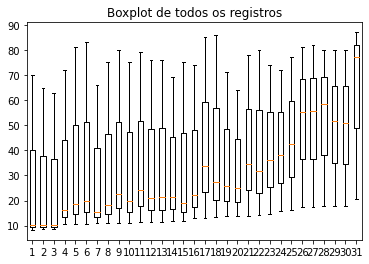

In [47]:
ax = plt.boxplot(dados)
plt.title('Boxplot de todos os registros')

Mútiplos Boxplots

{'boxes': [<matplotlib.patches.PathPatch at 0x7f8bcf4da550>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8bcf501ad0>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8bcf509590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8bcf501050>,
  <matplotlib.lines.Line2D at 0x7f8bcf501590>]}

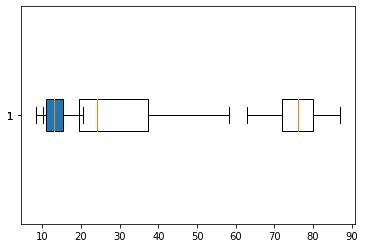

In [36]:
plt.boxplot(dados.Volume, vert=False, # vertical false
            showfliers = False,        # exibir outlier
            notch = False,             # add sunueta na mediana
            patch_artist = False)     # add cor 
plt.boxplot(dados.Height, vert=False, showfliers = False, notch = False, patch_artist = False) 
plt.boxplot(dados.Girth, vert=False, showfliers = False, notch = False, patch_artist = True) 

Com o Seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Árvores')

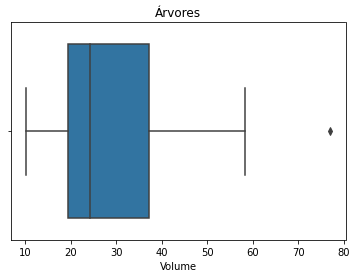

In [56]:
sns.boxplot(dados.Volume).set_title('Árvores')

Text(0.5, 1.0, 'Árvores')

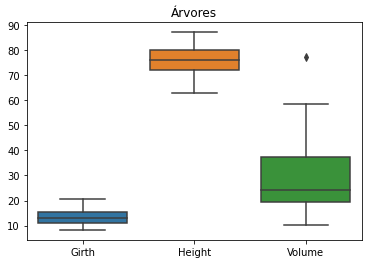

In [58]:
sns.boxplot(data = dados).set_title('Árvores')

### Gráfico dispersão

In [90]:
dados = pd.read_csv('co2.csv')
dados.head()

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3


Com matplotlib

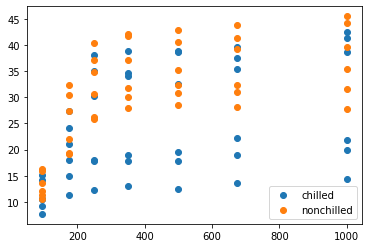

In [91]:
x = dados.conc
y = dados.uptake
tiposTratamento = list(set(dados.Treatment)) # o set faz o mesmo que o método unique() retornando sem repetição 

# laço para obter os indices dos registros que correspondem a cada categoria
for i in range(len(tiposTratamento)):
  indice = dados.Treatment == tiposTratamento[i] 
  plt.scatter(x[indice], y[indice], label = tiposTratamento[i]) # add a legenda conforme a categoria

plt.legend(loc = 'lower right') 

Com Seaborn

In [92]:
tiposOrigem = list(set(dados['Type']))
tiposOrigem

['Mississippi', 'Quebec']

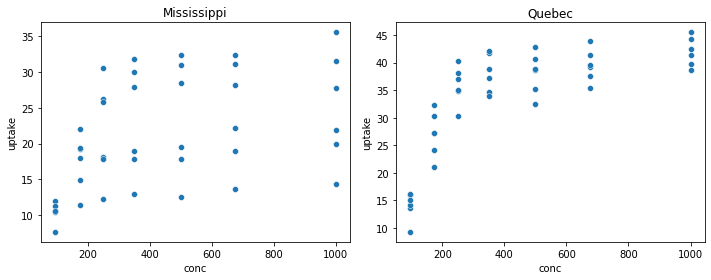

In [100]:
plt.figure(figsize=(10,4))
plt.title('Origem')
for i in range(len(tiposOrigem)):
  x = dados.loc[dados['Type'] == tiposOrigem[i]].conc   # variável 
  y = dados.loc[dados['Type'] == tiposOrigem[i]].uptake # variável
  plt.subplot(1,2,i+1)                                  # posição do plot
  sns.scatterplot(x,y).set_title(tiposOrigem[i])        # plot

plt.tight_layout()                                      # configuração para evitar sobreposição dos plots

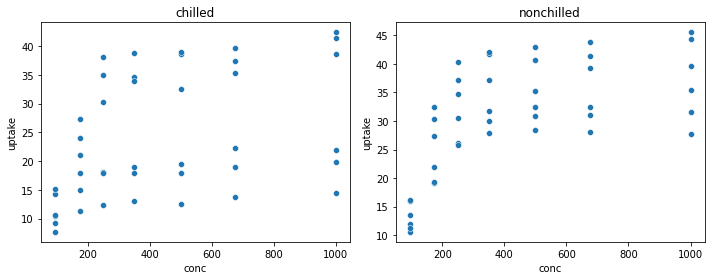

In [106]:
plt.figure(figsize=(10,4))
plt.title('Tipo de tratamento')
for i in range(len(tiposTratamento)):
  x = dados.loc[dados['Treatment']==tiposTratamento[i]].conc
  y = dados.loc[dados['Treatment']==tiposTratamento[i]].uptake
  plt.subplot(1,2,i+1)
  sns.scatterplot(x,y).set_title(tiposTratamento[i])

plt.tight_layout()



In [107]:
dados = pd.read_csv('esoph.csv') # base de dados sobre cancer de esofago. Atributos: idade,  tempo de consumo de alcool, tabaco, numero caso, numero controle
dados

,agegp,alcgp,tobgp,ncases,ncontrols
0,25-34,0-39g/day,0-9g/day,0,40
1,25-34,0-39g/day,10-19,0,10
2,25-34,0-39g/day,20-29,0,6
3,25-34,0-39g/day,30+,0,5
4,25-34,40-79,0-9g/day,0,27
...,...,...,...,...,...
83,75+,40-79,30+,1,1
84,75+,80-119,0-9g/day,1,1
85,75+,80-119,10-19,1,1
86,75+,120+,0-9g/day,2,2


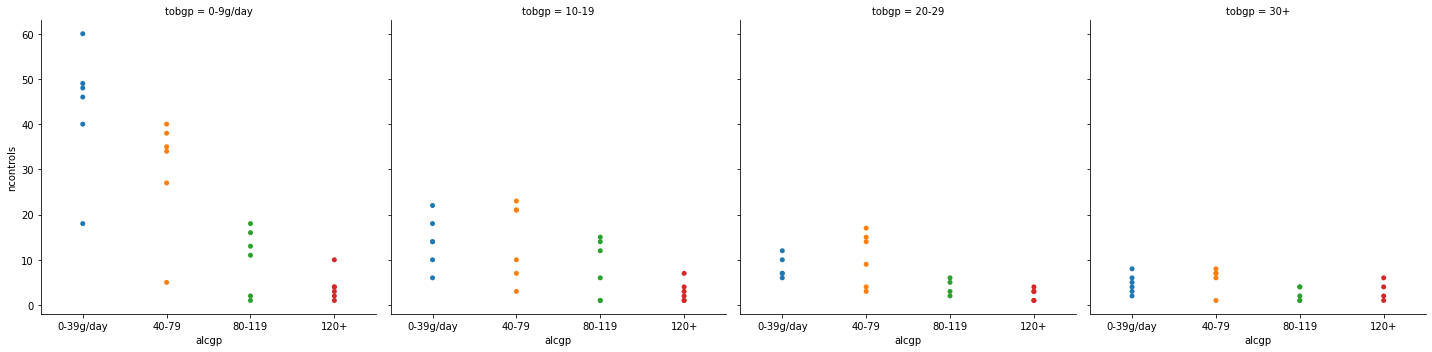

In [109]:
sns.catplot(x = 'alcgp',  # variavel x
            y='ncontrols', # variavel y (categorica)
            data=dados, 
            jitter=False, # permitir a sobreposição dos dados
            col='tobgp') #separa o grafico pela categoria da quantidade de tabaco consumida diariamente

### Grafico de Barra e Setores

In [87]:
dados = pd.read_csv('insect.csv')
dados.head()

,count,spray
0,10,A
1,7,A
2,20,A
3,14,A
4,14,A


Agrupando as categorias de Spray e somando a contagem 'count' 

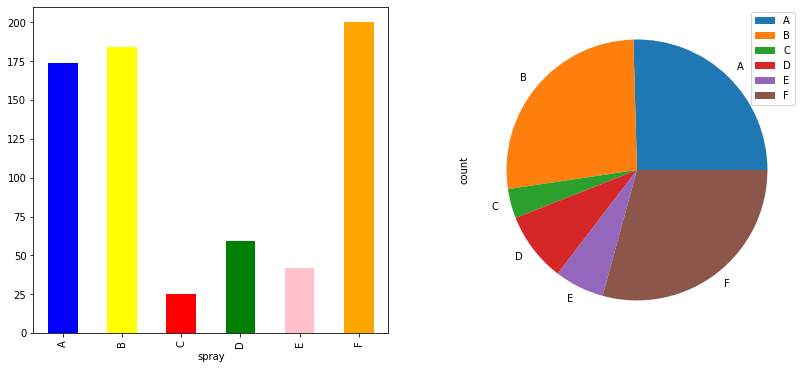

In [89]:
agrupado = dados.groupby(['spray'])['count'].sum()
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
agrupado.plot.bar(color = ['blue','yellow','red','green','pink','orange'])
plt.subplot(1,2,2)
agrupado.plot.pie(legend = True)

### Histograma

In [81]:
dados = pd.read_csv('chicken.csv')
tiposFeeds = list(set(dados['feed']))
tiposFeeds

['linseed', 'soybean', 'horsebean', 'casein', 'meatmeal', 'sunflower']

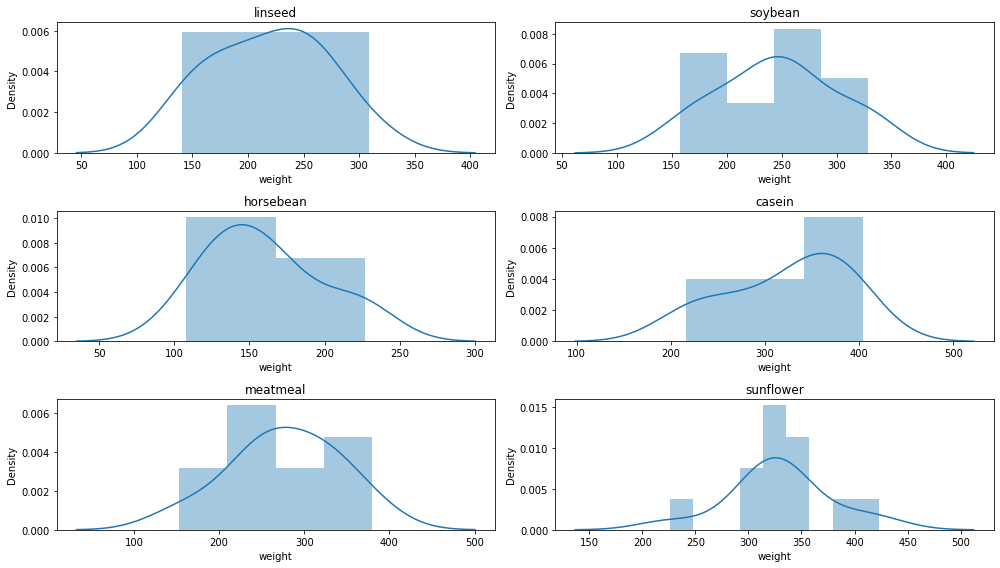

In [85]:
plt.figure(figsize=(14,8))
for i in range(len(tiposFeeds)):
  plt.subplot(3,2,i+1)
  sns.distplot(dados.loc[dados['feed']==tiposFeeds[i]].weight, hist = True).set_title(tiposFeeds[i])

plt.tight_layout() # para que não haja sobreposição

### Múltiplos plots

Uma das maneiras de adicionar diversos gráficos na mesma figura

Text(0.5, 1.0, 'Histograma')

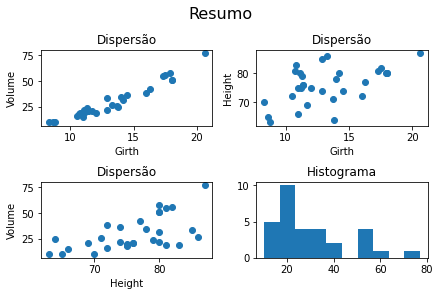

In [16]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
axs[0,0].scatter(dados.Girth, dados.Volume)
axs[0,0].set_title('Dispersão')
axs[0,0].set_xlabel('Girth')
axs[0,0].set_ylabel('Volume')
fig.suptitle('Resumo', fontsize=16)

axs[0,1].scatter(dados.Girth, dados.Height)
axs[0,1].set_title('Dispersão')
axs[0,1].set_xlabel('Girth')
axs[0,1].set_ylabel('Height')

axs[1,0].scatter(dados.Height, dados.Volume)
axs[1,0].set_title('Dispersão')
axs[1,0].set_xlabel('Height')
axs[1,0].set_ylabel('Volume')

axs[1,1].hist(dados.Volume)
axs[1,1].set_title('Histograma')


### Gráfico 3D

In [110]:
dados = pd.read_csv('orchard.csv')
dados

,decrease,rowpos,colpos,treatment
0,57,1,1,D
1,95,2,1,E
2,8,3,1,B
3,69,4,1,H
4,92,5,1,G
...,...,...,...,...
59,14,4,8,B
60,86,5,8,H
61,55,6,8,E
62,3,7,8,A


Text(0.5, 0, 'colpos')

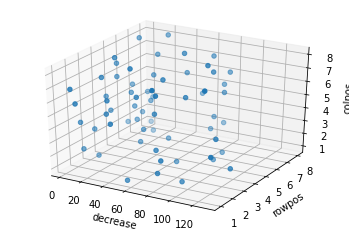

In [111]:
fig = plt.figure()
eixo = fig.add_subplot(1,1,1, projection = '3d')
eixo.scatter(dados.decrease, dados.rowpos, dados.colpos)
eixo.set_xlabel('decrease')
eixo.set_ylabel('rowpos')
eixo.set_zlabel('colpos')